## **Task 1: Data Preprocessing**


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import time

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


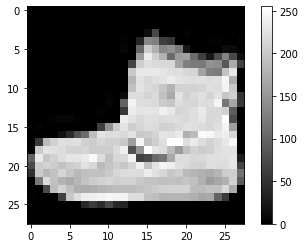

In [ ]:
from matplotlib import pyplot
plt.figure()
plt.imshow(train_images[0], cmap=pyplot.get_cmap('gray'))
plt.colorbar()
plt.grid(False)
plt.show()

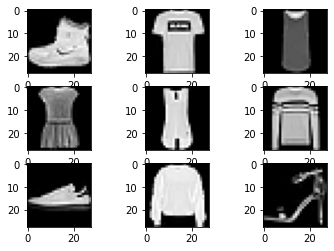

In [ ]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
x_train_unnor = train_images.reshape((train_images.shape[0], 784))
x_test_unnor = test_images.reshape((test_images.shape[0], 784))
print(x_train_unnor.shape)
print(x_test_unnor.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train = train_images.reshape((train_images.shape[0], 784))
x_test = test_images.reshape((test_images.shape[0], 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train = x_train.astype('float32')
x_train -= np.mean(x_train, axis = 0)
x_train /= np.std(x_train, axis = 0)

x_test = x_test.astype('float32')
x_test -= np.mean(x_test, axis = 0)
x_test /= np.std(x_test, axis = 0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, normalize
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(X=np.reshape(train_labels, (-1,1)))
y_test = one_hot_encoder.fit_transform(X=np.reshape(test_labels, (-1,1)))
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## **Task 2: MLP Models**

In [ ]:
import numpy as np
import math
import time
%matplotlib inline
import matplotlib.pyplot as plt
from PIL.Image import NONE
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        
    def run(self, gradient_fn, x, y, params):
        norms = np.array([np.inf])
        t = 1
        while np.any(norms > self.epsilon) and t < self.max_iters:
            grad = gradient_fn(x, y, params)
            for p in range(len(params)):
                params[p] -= self.learning_rate * grad[p]
            t += 1
            norms = np.array([np.linalg.norm(g) for g in grad])
        return params

In [ ]:
class GradientDescent_0:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

### **Model 1: 0 or 1 hidden layer**

In [ ]:
# 0 or 1 hidden layer
logistic = lambda z: 1./ (1 + np.exp(-z))
ReLU = lambda x: x*(x > 0)
tanh = lambda x: np.tanh(x)
leakyReLu = lambda x: np.where(x > 0, x, x * 0.01)

dReLU = lambda z: 1 * (z>0)
dtanh = lambda z: 1 - z**2
dleakyReLu = lambda z: np.where(z>0, 1, 0.01)

ReLU.__name__ = 'ReLU'
tanh.__name__ = 'tanh'
leakyReLu.__name__ = 'leakyReLu'
hidden_unit = []

class MLP:
    
    def __init__(self, M = hidden_unit, ac = ReLU, H = None, epochs = 20, batch_size=32, add_bias=True):
      # M: the number of units in the hidden layers
      # ac: activation function
      # H: the number of hidden layers
        self.M = M
        self.ac = ac
        self.H = H
        self.epochs = epochs
        self.batch_size = batch_size
        self.add_bias = add_bias
        pass

    def softmax(self, a):
        yh = np.exp(a)
        return yh / yh.sum(axis=1, keepdims=True)

    def loss(self, yh, y):
        # Compute the loss along the rows, averaging along the number of samples
        return ((-np.log(yh))*y).sum(axis=1).mean()
    
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
           x = x[:, None]
        if self.add_bias:
           N,D = x.shape 
           x = np.column_stack([x,np.ones(N)])

           if self.H is not None:
              N,D = x.shape
              def gradient(x, y, params):
                  v, w = params
                  z = self.ac(np.dot(x, v)) #N x M
                  yh = self.softmax(np.dot(z, w))
                  dy = yh - y #N
                  dw = np.dot(z.T, dy)/N #M
                  dz = np.dot(dy, w.T) #N x M
                  dReLu = 1 * (z>0)
                  dv = np.dot(x.T, dz * dReLu)/N #D x M
                  dparams = [dv, dw]
                  return dparams
              w = np.random.randn(self.M[0], 10) * .01
              v = np.random.randn(D,self.M[0]) * .01
              params0 = [v,w]
              self.params = optimizer.run(gradient, x, y, params0)
          
           if self.H is None:
              N,D = x.shape
              def gradient(x, y, w):
                  yh = self.softmax(np.dot(x, w))
                  dy = yh - y #N
                  dw = np.dot(x.T, dy)/N #M
                  dparams = dw
                  return dparams
              w = np.random.randn(D, 10) * .01
              self.w = optimizer.run(gradient, x, y, w)  
          
        return self


    def accuracy(self, y, yh):
        accuracy = sum(yh.argmax(axis=1) == y.argmax(axis=1))
        accuracy = accuracy / y.shape[0]
        return accuracy

    def predict(self, x):
        if x.ndim == 1:
           x = x[:, None]
        if self.add_bias:
           N,D = x.shape
           x = np.column_stack([x,np.ones(N)])

           if self.H is not None:
              v, w = self.params
              z = self.ac(np.dot(x, v)) #N x M
              yh = self.softmax(np.dot(z, w)) #N
              #train_acc = self.accuracy(model.predict(x), y)

           if self.H is None:
              w = self.w
              yh = self.softmax(np.dot(x, w))
        
        return yh


    def train(self, x, y, x_test, y_test, optimizer):
        print(f"Model Training --- Batch Size {self.batch_size}")
        for epoch in range(self.epochs):
            N = x.shape[0] 
            shuffle = np.random.permutation(N)
            train_loss = 0
            train_acc = 0
            test_loss = 0
            test_acc = 0
            X_batches = np.array_split(x[shuffle],N/self.batch_size)
            Y_batches = np.array_split(y[shuffle],N/self.batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.fit(batch_x, batch_y, optimizer)
                yh = self.predict(batch_x)
                train_acc += self.accuracy(yh, batch_y)
                train_loss += self.loss(yh, batch_y)
            train_loss = round(train_loss/len(X_batches), 4)
            train_acc = round(train_acc/len(X_batches), 4)
            
            yh_test = self.predict(x_test)
            test_acc += self.accuracy(yh_test, y_test)
            test_loss += self.loss(yh_test, y_test)
            test_acc = round(test_acc, 4)
            test_loss = round(test_loss, 4)

            print(f"Epoch {epoch+1}: train acc = {train_acc}  train loss = {train_loss} | test acc = {test_acc} | test loss = {test_loss}")
       


### **Model 2: 2 hidden layers**####

In [ ]:
# MLP: 2 hidden layers
logistic = lambda z: 1./ (1 + np.exp(-z))
ReLU = lambda x: x*(x > 0)
tanh = lambda x: np.tanh(x)
leakyReLu = lambda x: np.where(x > 0, x, x * 0.01)

dReLU = lambda z: 1 * (z>0)
dtanh = lambda z: 1 - z**2
dleakyReLu = lambda z: np.where(z>0, 1, 0.01)

ReLU.__name__ = 'ReLU'
tanh.__name__ = 'tanh'
leakyReLu.__name__ = 'leakyReLu'

hidden_unit = []

class MLP2_all:
    
    def __init__(self, M = hidden_unit, ac1 = ReLU, ac2 = ReLU, epochs = 20, batch_size=32, add_bias=True):
      # M: the number of units in the hidden layers
      # ac: activation function
      # H: the number of hidden layers
        self.M = M
        self.ac1 = ac1
        self.ac2 = ac2
        self.epochs = epochs
        self.batch_size = batch_size
        self.add_bias = add_bias
        pass

    def softmax(self, a):
        yh = np.exp(a)
        return yh / yh.sum(axis=1, keepdims=True)

    def loss(self, yh, y):
        # Compute the loss along the rows, averaging along the number of samples
        return ((-np.log(yh))*y).sum(axis=1).mean()

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
           x = x[:, None]
        if self.add_bias:
           N,D = x.shape 
           x = np.column_stack([x,np.ones(N)])

           N,D = x.shape
           def gradient(x, y, params):
               v1, v2, w = params
               z1 = self.ac1(np.dot(x, v1))
               z2 = self.ac2(np.dot(z1, v2)) #N x M
               yh = self.softmax(np.dot(z2, w))

              # Gradient from output layer to hidden layer 2
               dy = yh - y #N
               dw = np.dot(z2.T, dy)/N #M
              
              # Gradient from hidden layer2 to hidden layer 1
               dz2 = np.dot(dy, w.T) #N x M
               if self.ac2 == leakyReLu:
                  dleakyReLu = np.where(z2>0, 1, 0.01)
                  d_ac2 = dleakyReLu
               if self.ac2 == tanh:
                  dtanh = 1 - z2**2
                  d_ac2 = dtanh
               if self.ac2 == ReLU:
                  dReLU = 1 * (z2>0)
                  d_ac2 = dReLU

               dv2 = np.dot(z1.T, dz2 * d_ac2)/N #D x M

              # Gradient from hidden layer 1 to input layer
               dz1 = np.dot(dz2, v2.T) #N x M
               if self.ac1 == leakyReLu:
                  dleakyReLu = np.where(z1>0, 1, 0.01)
                  d_ac1 = dleakyReLu
               if self.ac1 == tanh:
                  dtanh = 1 - z1**2
                  d_ac1 = dtanh
               if self.ac1 == ReLU:
                  dReLU = 1 * (z1>0)
                  d_ac1 = dReLU
              
               dv1 = np.dot(x.T, dz1 * d_ac1)/N #D x M

               dparams = [dv1, dv2, dw]
               return dparams
          
           w = np.random.randn(self.M[1], 10) * .01
           v2 = np.random.randn(self.M[0], self.M[1]) * .01
           v1 = np.random.randn(D,self.M[0]) * .01
           params0 = [v1, v2, w]
           self.params = optimizer.run(gradient, x, y, params0)
        
        return self

    def accuracy(self, y, yh):
        accuracy = sum(yh.argmax(axis=1) == y.argmax(axis=1))
        accuracy = accuracy / y.shape[0]
        return accuracy

    def predict(self, x):
        if x.ndim == 1:
           x = x[:, None]
        if self.add_bias:
           N,D = x.shape
           x = np.column_stack([x,np.ones(N)])

           v1, v2, w = self.params
           z1 = self.ac1(np.dot(x, v1))
           z2 = self.ac2(np.dot(z1, v2)) #N x M
           yh = self.softmax(np.dot(z2, w)) #N

        return yh
      

    def train(self, x, y, x_test, y_test, optimizer):
        print(f"Model Training --- Batch Size {self.batch_size}")
        for epoch in range(self.epochs):
            N = x.shape[0] 
            shuffle = np.random.permutation(N)
            train_acc = 0
            train_loss = 0
            test_acc = 0
            test_loss = 0
            
            X_batches = np.array_split(x[shuffle],N/self.batch_size)
            Y_batches = np.array_split(y[shuffle],N/self.batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.fit(batch_x, batch_y, optimizer)
                yh = self.predict(batch_x)
                train_acc += self.accuracy(yh, batch_y)
                train_loss += self.loss(yh, batch_y)
            train_loss = round(train_loss/len(X_batches), 4)
            train_acc = round(train_acc/len(X_batches), 4)
            
            yh_test = self.predict(x_test)
            test_acc += self.accuracy(yh_test, y_test)
            test_loss += self.loss(yh_test, y_test)
            test_acc = round(test_acc, 4)
            test_loss = round(test_loss, 4)
            
            
            print(f"Epoch {epoch+1}: train acc = {train_acc}  train loss = {train_loss} | test acc = {test_acc} | test loss = {test_loss}")
       

####**MLP model: 2 hidden layers with L2 regularization**####

In [ ]:
# MLP: 2 hidden layers with L2
logistic = lambda z: 1./ (1 + np.exp(-z))
ReLU = lambda x: x*(x > 0)
tanh = lambda x: np.tanh(x)
leakyReLu = lambda x: np.where(x > 0, x, x * 0.01)

dReLU = lambda z: 1 * (z>0)
dtanh = lambda z: 1 - z**2
dleakyReLu = lambda z: np.where(z>0, 1, 0.01)

ReLU.__name__ = 'ReLU'
tanh.__name__ = 'tanh'
leakyReLu.__name__ = 'leakyReLu'

hidden_unit = []

class MLP2_all_L2:
    
    def __init__(self, M = hidden_unit, ac1 = ReLU, ac2 = ReLU, add_bias=True):
      # M: the number of units in the hidden layers
      # ac: activation function
      # H: the number of hidden layers
        self.M = M
        self.ac1 = ac1
        self.ac2 = ac2
        self.add_bias = add_bias
        pass

    def softmax(self, a):
        yh = np.exp(a)
        return yh / yh.sum(axis=1, keepdims=True)

    def loss(self, yh, y):
        # Compute the loss along the rows, averaging along the number of samples
        return ((-np.log(yh))*y).sum(axis=1).mean()

    def fit(self, x, y, optimizer,lam):
        if x.ndim == 1:
           x = x[:, None]
        if self.add_bias:
           N,D = x.shape 
           x = np.column_stack([x,np.ones(N)])

           N,D = x.shape
           def gradient(x, y, params):
               v1, v2, w = params
               z1 = self.ac1(np.dot(x, v1))
               z2 = self.ac2(np.dot(z1, v2)) #N x M
               yh = self.softmax(np.dot(z2, w))

              # Gradient from output layer to hidden layer 2
               dy = yh - y #N
               dw = np.dot(z2.T, dy)/N+ lam*(1/N)*np.sum(np.square(w)) #M
              
              # Gradient from hidden layer2 to hidden layer 1
               dz2 = np.dot(dy, w.T) #N x M
               if self.ac2 == leakyReLu:
                  dleakyReLu = np.where(z2>0, 1, 0.01)
                  d_ac2 = dleakyReLu
               if self.ac2 == tanh:
                  dtanh = 1 - z2**2
                  d_ac2 = dtanh
               if self.ac2 == ReLU:
                  dReLU = 1 * (z2>0)
                  d_ac2 = dReLU

               dv2 = np.dot(z1.T, dz2 * d_ac2)/N+lam*(1/N)*np.sum(np.square(v2))/N#D x M

              # Gradient from hidden layer 1 to input layer
               dz1 = np.dot(dz2, v2.T) #N x M
               if self.ac1 == leakyReLu:
                  dleakyReLu = np.where(z1>0, 1, 0.01)
                  d_ac1 = dleakyReLu
               if self.ac1 == tanh:
                  dtanh = 1 - z1**2
                  d_ac1 = dtanh
               if self.ac1 == ReLU:
                  dReLU = 1 * (z1>0)
                  d_ac1 = dReLU
              
               dv1 = np.dot(x.T, dz1 * d_ac1)/N+lam*(1/N)*np.sum(np.square(v1)) #D x M

               dparams = [dv1, dv2, dw]
               return dparams
          
           w = np.random.randn(self.M[1], 10) * .01
           v2 = np.random.randn(self.M[0], self.M[1]) * .01
           v1 = np.random.randn(D,self.M[0]) * .01
           params0 = [v1, v2, w]
           self.params = optimizer.run(gradient, x, y, params0)
        
        return self

    def accuracy(self, y, yh):
        accuracy = sum(yh.argmax(axis=1) == y.argmax(axis=1))
        accuracy = accuracy / y.shape[0]
        return accuracy

    def predict(self, x):
        if x.ndim == 1:
           x = x[:, None]
        if self.add_bias:
           N,D = x.shape
           x = np.column_stack([x,np.ones(N)])

           v1, v2, w = self.params
           z1 = self.ac1(np.dot(x, v1))
           z2 = self.ac2(np.dot(z1, v2)) #N x M
           yh = self.softmax(np.dot(z2, w)) #N

        return yh
      

##**Task 3: Experiments**###

In [ ]:
def evaluate_acc(yh, y):
    acc = sum(yh.argmax(axis=1) == y.argmax(axis=1))
    acc = acc / y.shape[0]
    return acc

###**1. MLP Models**###

#### **1.1 MLP: 0 hidden layer**####

In [ ]:
# 0 hidden layer model training
model0 = MLP(M = [0], H = None, add_bias=True)
optimizer = GradientDescent_0(learning_rate=.1, max_iters=200)
yh_train_0 = model0.fit(x_train, y_train, optimizer).predict(x_train)

In [ ]:
# Train accuracy: 0 hidden layer
train_accuracy_0 = round(evaluate_acc(yh_train_0, y_train), 4)
train_loss_0 = round(model0.loss(yh_train_0, y_train), 4)

# Test accuracy: 0 hidden layer
yh_test_0 = model0.predict(x_test)
test_accuracy_0 = round(evaluate_acc(yh_test_0, y_test), 4)
test_loss_0 = round(model0.loss(yh_test_0, y_test), 4)

print(f"train acc = {train_accuracy_0}  train loss = {train_loss_0} | test acc = {test_accuracy_0}  test loss = {test_loss_0}")


train acc = 0.8514  train loss = 0.4392 | test acc = 0.8336  test loss = 0.4774


####**1.2 MLP: 1 hidden layer (128 units and ReLU)**####

In [ ]:
# 1 hidden layer model training
model1 = MLP(M = [128], ac = ReLU, H = 1, add_bias=True)
optimizer = GradientDescent(learning_rate=.1, max_iters=200)
yh_train_1 = model1.fit(x_train, y_train, optimizer).predict(x_train)

In [ ]:
# Train accuracy: 1 hidden layer with ReLU
train_accuracy_1 = round(evaluate_acc(yh_train_1, y_train), 4)
train_loss_1 = round(model1.loss(yh_train_1, y_train), 4)

# Test accuracy: 1 hidden layer with ReLU
yh_test_1 = model1.predict(x_test)
test_accuracy_1 = round(evaluate_acc(yh_test_1, y_test), 4)
test_loss_1 = round(model1.loss(yh_test_1, y_test), 4)

print(f"train acc = {train_accuracy_1}  train loss = {train_loss_1} | test acc = {test_accuracy_1}  test loss = {test_loss_1}")


train acc = 0.8417  train loss = 0.4469 | test acc = 0.8273  test loss = 0.4791


####**1.3 MLP: 2 hidden layers (128 units and ReLU)**####

In [ ]:
# 2 hidden layer model training with ReLU
model2 = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, add_bias=True)
optimizer = GradientDescent(learning_rate=.1, max_iters=200)
yh_train_2 = model2.fit(x_train, y_train, optimizer).predict(x_train)

In [ ]:
# Train accuracy: 2 hidden layers with LeakyReLU
train_accuracy_2 = round(evaluate_acc(yh_train_2, y_train), 4)
train_loss_2 = round(model2.loss(yh_train_2, y_train), 4)

# Test accuracy: 2 hidden layers with LeakyReLU
yh_test_2 = model2.predict(x_test)
test_accuracy_2 = round(evaluate_acc(yh_test_2, y_test), 4)
test_loss_2 = round(model2.loss(yh_test_2, y_test), 4)

print(f"train acc = {train_accuracy_2}  train loss = {train_loss_2} | test acc = {test_accuracy_2}  test loss = {test_loss_2}")


train acc = 0.7529  train loss = 0.6572 | test acc = 0.7462  test loss = 0.6742


###**2. MLP (2 hidden layers, tanh and Leaky-ReLU)**###

####**2.1 tanh**

**MLP model: 2 hidden layers, tanh, 128 units**

In [ ]:
# 2 hidden layer model training with tanh and Leaky-ReLU
model3 = MLP2_all(M = [128, 128], ac1 = tanh, ac2 = tanh, add_bias=True)
optimizer = GradientDescent(learning_rate=.1, max_iters=200)
yh_train_3 = model3.fit(x_train, y_train, optimizer).predict(x_train)

In [ ]:
# Train accuracy: 2 hidden layer with tanh 
train_accuracy_3 = round(evaluate_acc(yh_train_3, y_train), 4)
train_loss_3 = round(model3.loss(yh_train_3, y_train), 4)

# Test accuracy: 2 hidden layer with tanh
yh_test_3 = model3.predict(x_test)
test_accuracy_3 = round(evaluate_acc(yh_test_3, y_test), 4)
test_loss_3 = round(model3.loss(yh_test_3, y_test), 4)

print(f"train acc = {train_accuracy_3}  train loss = {train_loss_3} | test acc = {test_accuracy_3}  test loss = {test_loss_3}")


train acc = 0.761  train loss = 0.6469 | test acc = 0.7553  test loss = 0.667


####**2.2 Leaky-ReLU**

**MLP model: 2 hidden layers, tanh, 128 units**

In [ ]:
# 2 hidden layer model training with LeakyReLU
model4 = MLP2_all(M = [128, 128], ac1 = leakyReLu, ac2 = leakyReLu, add_bias=True)
optimizer = GradientDescent(learning_rate=.1, max_iters=200)
yh_train_4 = model4.fit(x_train, y_train, optimizer).predict(x_train)

In [ ]:
# Train accuracy: 2 hidden layer with LeakyReLU
train_accuracy_4 = round(evaluate_acc(yh_train_4, y_train), 4)
train_loss_4 = round(model4.loss(yh_train_4, y_train), 4)

# Test accuracy: 2 hidden layer with LeakyReLU
yh_test_4 = model4.predict(x_test)
test_accuracy_4 = round(evaluate_acc(yh_test_4, y_test), 4)
test_loss_4 = round(model4.loss(yh_test_4, y_test), 4)

print(f"train acc = {train_accuracy_4}  train loss = {train_loss_4} | test acc = {test_accuracy_4}  test loss = {test_loss_4}")


train acc = 0.7556  train loss = 0.6412 | test acc = 0.7503  test loss = 0.6587


###**3. MLP with L2: 2 hidden layers (128 units and ReLU)**####

In [ ]:
lam=[10,3,1,0.1,0.01,0.001,0]
for i in lam:
    model0_all_L2 = MLP2_all_L2(M = [128,128], ac1 = ReLU,ac2= ReLU, add_bias=True)
    optimizer = GradientDescent(learning_rate=0.1, max_iters=200)
    yh_train_L2 = model0_all_L2.fit(x_train, y_train, optimizer, i).predict(x_train)

    train_accuracy_0_L2 = evaluate_acc(yh_train_L2, y_train)
    train_loss_0_L2 = model0_all_L2.loss(yh_train_L2, y_train)

    yh_test_L2 = model0_all_L2.fit(x_train, y_train, optimizer,i).predict(x_test)
    test_accuracy_L2 = evaluate_acc(yh_test_L2, y_test)
    test_loss_L2 = model0_all_L2.loss(yh_test_L2, y_test)
    
    print(f"lambda={i} train acc = {train_accuracy_0_L2}  train loss = {train_loss_0_L2} test acc = {test_accuracy_L2}  test loss = {test_loss_L2}")

lambda=10 train acc = 0.7514333333333333  train loss = 0.6522858590207571 test acc = 0.7522  test loss = 0.6569009632420871
lambda=3 train acc = 0.75295  train loss = 0.6422306276429952 test acc = 0.7533  test loss = 0.6508427293369564
lambda=1 train acc = 0.7593833333333333  train loss = 0.6281464411252028 test acc = 0.755  test loss = 0.6456529556970915
lambda=0.1 train acc = 0.7568166666666667  train loss = 0.631603503997426 test acc = 0.7512  test loss = 0.6503827176053253
lambda=0.01 train acc = 0.7526  train loss = 0.6562552198843775 test acc = 0.7483  test loss = 0.6688992446757517
lambda=0.001 train acc = 0.7547166666666667  train loss = 0.637166488848253 test acc = 0.7548  test loss = 0.6422733376724766
lambda=0 train acc = 0.7549333333333333  train loss = 0.6370523384852298 test acc = 0.7515  test loss = 0.6437103235233103


###**4. MLP with unnormalized data**###

**MLP model: 2 hidden layers, ReLU, 128 units, unnormalized data** 

In [ ]:
# MLP: 2 hidden layer model with ReLU
# Unnormalized data
model_unnor = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, add_bias=True)
optimizer = GradientDescent(learning_rate=.01, max_iters=200)
yh_train_unnor = model_unnor.fit(x_train_unnor, y_train, optimizer).predict(x_train_unnor)

In [ ]:
# Unnormalized data
# Train accuracy: 2 hidden layer with ReLU 
train_accuracy_unnor = round(evaluate_acc(yh_train_unnor, y_train), 4)
train_loss_unnor = round(model_unnor.loss(yh_train_unnor, y_train), 4)

# Test accuracy: 2 hidden layer with ReLU
yh_test_unnor = model_unnor.predict(x_test_unnor)
test_accuracy_unnor = round(evaluate_acc(yh_test_unnor, y_test), 4)
test_loss_unnor = round(model_unnor.loss(yh_test_unnor, y_test), 4)

print(f"train acc = {train_accuracy_unnor}  train loss = {train_loss_unnor} | test acc = {test_accuracy_unnor}  test loss = {test_loss_unnor}")


train acc = 0.8149  train loss = 0.5137 | test acc = 0.8017  test loss = 0.5401


### **5. Convolutional Neural Network (ConvNet)**

In [ ]:
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, Dropout, MaxPooling2D, Activation, ZeroPadding2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.serialization import activation

In [ ]:
# normalization
x_train_cnn = train_images.astype('float32')
x_train_cnn -= np.mean(train_images, axis = 0)
x_train_cnn /= np.std(train_images, axis = 0)

x_test_cnn = test_images.astype('float32')
x_test_cnn -= np.mean(test_images, axis = 0)
x_test_cnn /= np.std(test_images, axis = 0)

# Reshape the images.
x_train_cnn = np.expand_dims(x_train_cnn, axis=3)
x_test_cnn = np.expand_dims(x_test_cnn, axis=3)
print(x_train_cnn.shape) # (60000, 28, 28, 1)
print(x_test_cnn.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### **5.1 With MaxPooling**

In [ ]:
num_filters = 8
filter_size = 3
num_classes = 10
pool_size = 2
input_shape = (x_train_cnn.shape[1:]) # (28, 28, 1)
strides     = 1
padding     = 'valid' 


model = Sequential()
model.add(Conv2D(filters = 4 * num_filters,
                 kernel_size = filter_size,
                 strides     = strides,
                 input_shape = input_shape,
                 padding     = padding,
                 activation  = 'relu')) 
# MaxPooling layer
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(filters = 8 * num_filters, kernel_size = (filter_size, filter_size), activation = 'relu'))
# MaxPooling layer
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Dropout(0.2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(128,activation='relu'))
# output layer
model.add(Dense(num_classes, activation='softmax'))


# compile and accuracy
model.compile(
  'adam',                             
  loss='categorical_crossentropy',    
  metrics=['accuracy'],               
)
history = model.fit(x_train_cnn, y_train, validation_data=(x_test_cnn, y_test), epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 73s 77ms/step - loss: 0.4743 - accuracy: 0.8258 - val_loss: 0.3449 - val_accuracy: 0.8770
Epoch 2/20
938/938 [==============================] - 66s 70ms/step - loss: 0.3165 - accuracy: 0.8820 - val_loss: 0.3068 - val_accuracy: 0.8861
Epoch 3/20
938/938 [==============================] - 57s 61ms/step - loss: 0.2739 - accuracy: 0.8979 - val_loss: 0.2745 - val_accuracy: 0.8982
Epoch 4/20
938/938 [==============================] - 59s 63ms/step - loss: 0.2440 - accuracy: 0.9094 - val_loss: 0.2696 - val_accuracy: 0.9009
Epoch 5/20
938/938 [==============================] - 57s 60ms/step - loss: 0.2220 - accuracy: 0.9166 - val_loss: 0.2645 - val_accuracy: 0.9050
Epoch 6/20
938/938 [==============================] - 57s 61ms/step - loss: 0.2002 - accuracy: 0.9240 - val_loss: 0.2577 - val_accuracy: 0.9033
Epoch 7/20
938/938 [==============================] - 58s 62ms/step - loss: 0.1854 - accuracy: 0.9295 - val_loss: 0.2506 - val_accuracy:

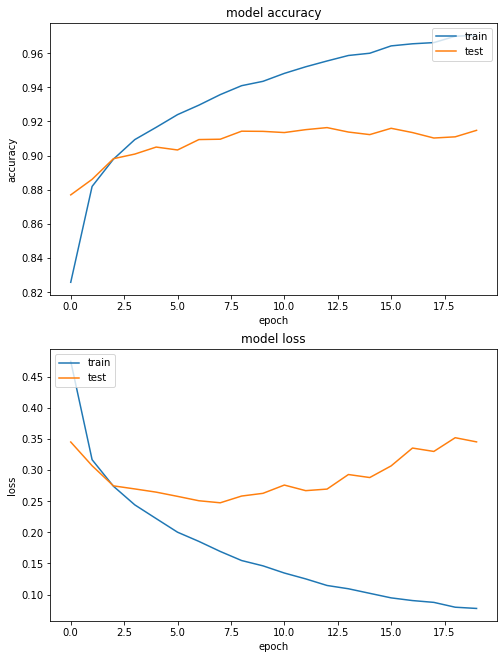

In [ ]:
# plot training history
plt.figure(figsize=(8,11))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# batch size = 1875
history_ = model.fit(x_train_cnn, y_train, validation_data=(x_test_cnn, y_test), epochs=20, batch_size=1875)

Epoch 1/20
32/32 [==============================] - 52s 2s/step - loss: 1.0127 - accuracy: 0.6552 - val_loss: 0.5987 - val_accuracy: 0.7757
Epoch 2/20
32/32 [==============================] - 49s 2s/step - loss: 0.5391 - accuracy: 0.7999 - val_loss: 0.4930 - val_accuracy: 0.8240
Epoch 3/20
32/32 [==============================] - 49s 2s/step - loss: 0.4531 - accuracy: 0.8371 - val_loss: 0.4236 - val_accuracy: 0.8512
Epoch 4/20
32/32 [==============================] - 51s 2s/step - loss: 0.4075 - accuracy: 0.8546 - val_loss: 0.3946 - val_accuracy: 0.8557
Epoch 5/20
32/32 [==============================] - 49s 2s/step - loss: 0.3796 - accuracy: 0.8636 - val_loss: 0.3778 - val_accuracy: 0.8617
Epoch 6/20
32/32 [==============================] - 48s 2s/step - loss: 0.3561 - accuracy: 0.8721 - val_loss: 0.3569 - val_accuracy: 0.8736
Epoch 7/20
32/32 [==============================] - 49s 2s/step - loss: 0.3395 - accuracy: 0.8773 - val_loss: 0.3422 - val_accuracy: 0.8776
Epoch 8/20
32/32 [==

#### **5.2 Without MaxPooling**

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 4 * num_filters,
                 kernel_size = filter_size,
                 strides     = strides,
                 input_shape = input_shape,
                 padding     = padding,
                 activation  = 'relu')) 
model1.add(Conv2D(filters = 8 * num_filters, kernel_size = (filter_size, filter_size), activation = 'relu'))

model1.add(Dropout(0.2))
#adding fully connected layer
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))

model1.add(Dense(128,activation='relu'))
# output layer
model1.add(Dense(num_classes, activation='softmax'))

# complie and accuracy
model1.compile(
  'adam',                             
  loss='categorical_crossentropy',    
  metrics=['accuracy'],               
)
history1 = model1.fit(x_train_cnn, y_train, validation_data=(x_test_cnn, y_test), epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 201s 213ms/step - loss: 0.3692 - accuracy: 0.8673 - val_loss: 0.2981 - val_accuracy: 0.8926
Epoch 2/20
938/938 [==============================] - 198s 211ms/step - loss: 0.2216 - accuracy: 0.9179 - val_loss: 0.2754 - val_accuracy: 0.9043
Epoch 3/20
938/938 [==============================] - 200s 213ms/step - loss: 0.1567 - accuracy: 0.9419 - val_loss: 0.2671 - val_accuracy: 0.9103
Epoch 4/20
938/938 [==============================] - 201s 214ms/step - loss: 0.1060 - accuracy: 0.9604 - val_loss: 0.2966 - val_accuracy: 0.9162
Epoch 5/20
938/938 [==============================] - 200s 213ms/step - loss: 0.0711 - accuracy: 0.9742 - val_loss: 0.3065 - val_accuracy: 0.9118
Epoch 6/20
938/938 [==============================] - 212s 226ms/step - loss: 0.0527 - accuracy: 0.9810 - val_loss: 0.3796 - val_accuracy: 0.9134
Epoch 7/20
938/938 [==============================] - 210s 224ms/step - loss: 0.0407 - accuracy: 0.9852 - val_loss: 0.4434 -

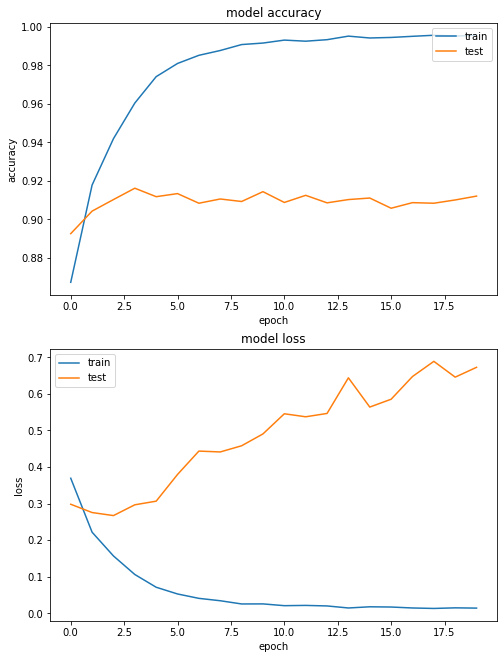

In [ ]:
# plot training history
plt.figure(figsize=(8,11))

# History for accuracy
plt.subplot(211)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **5.3 Investigate Hyperparameters**

In [ ]:
def iterate_cnn(num_filters,filter_size,num_classes, input_shape, strides, padding):
    res = {}
    i = 0
    while i < len(num_filters):
      nf= num_filters[i]
      j = 0
      while j < len(filter_size):
        fs = filter_size[j] 
        model = Sequential([
          Conv2D(filters = 4 * nf, kernel_size = fs, input_shape=input_shape, padding=padding, strides=strides, activation='relu'),
          MaxPooling2D(pool_size=2),
          Conv2D(8 * nf, kernel_size=(fs, fs), activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          Dropout(0.2),                        
          Flatten(),
          Dense(128, activation = 'relu'),
          Dense(128, activation = "relu"),
          Dense(num_classes, activation='softmax') #output layer
        ])
        model.compile(
          'adam',                             
          loss='categorical_crossentropy',    
          metrics=['accuracy'],              
        )
        model.fit(x_train_cnn, y_train, epochs=5, batch_size=64)
        acc = model.evaluate(x_test_cnn, y_test)[1]*100
        res[(num_filters[i],filter_size[j] )]=acc
        j +=1
      i +=1
    return res


In [ ]:
# padding = valid
num_filters = [5,8,10]
filter_size = [1,3,8]
num_classes = 10
input_shape = (x_train_cnn.shape[1:]) # (28, 28, 1)
strides     = 1
padding     = 'valid' 

res_valid = iterate_cnn(num_filters,filter_size,num_classes, input_shape, strides, padding)
res_valid

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.5441 - accuracy: 0.8014
Epoch 2/5
938/938 [==============================] - 26s 27ms/step - loss: 0.4227 - accuracy: 0.8440
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.3887 - accuracy: 0.8559
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.3679 - accuracy: 0.8624
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3586 - accuracy: 0.8674
Epoch 1/5
938/938 [==============================] - 38s 39ms/step - loss: 0.4894 - accuracy: 0.8208
Epoch 2/5
938/938 [==============================] - 37s 39ms/step - loss: 0.3338 - accuracy: 0.8783
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.2906 - accuracy: 0.8923
Epoch 4/5
938/938 [==============================] - 36s 39ms/step - loss: 0.2619 - accuracy: 0.9029
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2631 - accuracy: 0

{(5, 1): 86.73999905586243,
 (5, 3): 90.27000069618225,
 (5, 8): 87.55000233650208,
 (8, 1): 85.78000068664551,
 (8, 3): 90.61999917030334,
 (8, 8): 88.41000199317932,
 (10, 1): 85.97999811172485,
 (10, 3): 90.38000106811523,
 (10, 8): 88.58000040054321}

In [ ]:
# padding = same
padding     = 'same' 

res_same = iterate_cnn(num_filters,filter_size,num_classes, input_shape, strides, padding)
res_same

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.5408 - accuracy: 0.8020
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.4186 - accuracy: 0.8452
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.3845 - accuracy: 0.8573
Epoch 4/5
938/938 [==============================] - 28s 29ms/step - loss: 0.3652 - accuracy: 0.8633
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3674 - accuracy: 0.8632
Epoch 1/5
938/938 [==============================] - 46s 49ms/step - loss: 0.4495 - accuracy: 0.8365
Epoch 2/5
938/938 [==============================] - 46s 49ms/step - loss: 0.3004 - accuracy: 0.8895
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.2573 - accuracy: 0.9043
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.2279 - accuracy: 0.9165
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2527 - accuracy: 0

{(5, 1): 86.32000088691711,
 (5, 3): 90.61999917030334,
 (5, 8): 89.17999863624573,
 (8, 1): 86.62999868392944,
 (8, 3): 91.4900004863739,
 (8, 8): 89.5799994468689,
 (10, 1): 87.27999925613403,
 (10, 3): 91.53000116348267,
 (10, 8): 90.2999997138977}

#### **5.4 Alter Training Size**

In [ ]:
iter = [1, 10, 100, 1000, 10000, 60000]
i = 0
res = {}

while i < len(iter):
  sub_train = x_train_cnn[0:iter[i]]
  sub_label = y_train[0:iter[i]]
  input_shape = (sub_train.shape[1:])

  model = Sequential()
  model.add(Conv2D(filters = 32,
                  kernel_size = 3,
                  strides     = 1,
                  input_shape = input_shape,
                  padding     = 'valid',
                  activation  = 'relu')) 
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.2))
  #adding fully connected layer
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  # output layer
  model.add(Dense(10, activation='softmax'))
  # compile and accuracy
  model.compile(
    'adam',                             
    loss='categorical_crossentropy',    
    metrics=['accuracy'],               
  )
  history = model.fit(sub_train, sub_label, validation_data=(x_test_cnn, y_test), epochs=5, batch_size=64)
  
  res[iter[i]] = history.history['val_accuracy'][-1]
  i += 1

res


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 2.1982 - accuracy: 0.0000e+00 - val_loss: 2.3137 - val_accuracy: 0.1057
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 1.8014 - accuracy: 1.0000 - val_loss: 2.3580 - val_accuracy: 0.1001
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 1.1493 - accuracy: 1.0000 - val_loss: 2.4962 - val_accuracy: 0.1000
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.6857 - accuracy: 1.0000 - val_loss: 2.8244 - val_accuracy: 0.1000
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 0.3217 - accuracy: 1.0000 - val_loss: 3.4775 - val_accuracy: 0.1000
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 2.2160 - accuracy: 0.2000 - val_loss: 2.2624 - val_accuracy: 0.1737
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 1.9107 - accuracy: 0.5000 - val_loss: 2.3005 - val_accuracy: 0.1688
Epoch 3/5
1/1 [=============================

{1: 0.10000000149011612,
 10: 0.21070000529289246,
 100: 0.5497999787330627,
 1000: 0.7730000019073486,
 10000: 0.8580999970436096,
 60000: 0.9043999910354614}

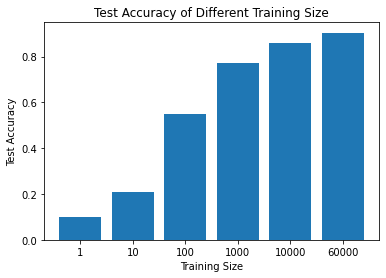

In [ ]:
training_size = res.keys()
test_acc = res.values()

plt.bar(range(len(res)), test_acc, tick_label = iter)
plt.title('Test Accuracy of Different Training Size')
plt.ylabel('Test Accuracy')
plt.xlabel('Training Size')
plt.show()

### **6. Best MLP Architecture**

####**6.1 Activation functions, learning rate and max iteration**####

Experiments below were conducted combing activation functions, learning rate and max iteration. Considering all these parameters and the training time, **MLP model with ReLU as activation functions outperformed the other models**. The combination of **0.1 learning rate and 1000 max iterations** produced better results throughout the experiment in this stage.  

In [ ]:
ac_functions = [ReLU, tanh, leakyReLu]
lr = [0.1, 0.01]
iters = [500, 1000]

for ac in ac_functions:
  print(f"ac: {ac.__name__}")
  for j in lr:
    for i in iters:
      model_compare_1 =MLP(M = [128], ac = ac, H = 1, add_bias=True)
      optimizer = GradientDescent(learning_rate = j, max_iters = i)
      start_1 = time.time()
      yh_train_compare_1 = model_compare_1.fit(x_train, y_train, optimizer).predict(x_train)
      tot_time = round(time.time()-start_1, 2)
      yh_test_compare_1 = model_compare_1.predict(x_test)
      train_acc_compare_1 = evaluate_acc(yh_train_compare_1, y_train)
      train_loss_compare_1 = model_compare_1.loss(yh_train_compare_1, y_train)
      test_acc_compare_1 = evaluate_acc(yh_test_compare_1, y_test)
      test_loss_compare_1 = model_compare_1.loss(yh_test_compare_1, y_test)
      print(f"learning rate: {j}  iteration: {i}  train time: {tot_time} | train acc = {round(train_acc_compare_1, 4)}  train loss = {round(train_loss_compare_1, 4)} | test acc = {round(test_acc_compare_1, 4)}  test loss = {round(test_loss_compare_1, 4)}")
  print()

ac: ReLU
learning rate: 0.1  iteration: 500  train time: 536.7 | train acc = 0.8703  train loss = 0.365 | test acc = 0.8539  test loss = 0.4082
learning rate: 0.1  iteration: 1000  train time: 1057.17 | train acc = 0.887  train loss = 0.3174 | test acc = 0.8665  test loss = 0.3759
learning rate: 0.01  iteration: 500  train time: 519.12 | train acc = 0.7534  train loss = 0.6891 | test acc = 0.748  test loss = 0.7032
learning rate: 0.01  iteration: 1000  train time: 1024.12 | train acc = 0.806  train loss = 0.5412 | test acc = 0.7939  test loss = 0.5634

ac: tanh
learning rate: 0.1  iteration: 500  train time: 645.5 | train acc = 0.8228  train loss = 0.5062 | test acc = 0.8116  test loss = 0.5374
learning rate: 0.1  iteration: 1000  train time: 1272.82 | train acc = 0.8422  train loss = 0.4512 | test acc = 0.8282  test loss = 0.4885
learning rate: 0.01  iteration: 500  train time: 624.97 | train acc = 0.7211  train loss = 0.8401 | test acc = 0.7192  test loss = 0.8513
learning rate: 0.01

In [ ]:
#ReLU as ac1
ac_functions = [ReLU, tanh, leakyReLu]
lr = [0.1, 0.01]
iters = [500, 1000]

for ac in ac_functions:
  print(f"ac1: ReLU  ac2: {ac.__name__}")
  for j in lr:
    for i in iters:
      model_compare = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ac, add_bias=True)
      optimizer = GradientDescent(learning_rate = j, max_iters = i)
      start = time.time()
      yh_train_compare = model_compare.fit(x_train, y_train, optimizer).predict(x_train)
      tot_time = round(time.time()-start, 2)
      yh_test_compare = model_compare.predict(x_test)
      train_acc_compare = evaluate_acc(yh_train_compare, y_train)
      train_loss_compare = model_compare.loss(yh_train_compare, y_train)
      test_acc_compare = evaluate_acc(yh_test_compare, y_test)
      test_loss_compare = model_compare.loss(yh_test_compare, y_test)
      print(f"learning rate: {j}  iteration: {i}  train time: {tot_time} | train acc = {round(train_acc_compare, 4)}  train loss = {round(train_loss_compare, 4)} | test acc = {round(test_acc_compare, 4)}  test loss = {round(test_loss_compare, 4)}")
  print()



ac1: ReLU  ac2: ReLU
learning rate: 0.1  iteration: 500  train time: 740.78 | train acc = 0.8439  train loss = 0.4325 | test acc = 0.8308  test loss = 0.4676
learning rate: 0.1  iteration: 1000  train time: 1472.52 | train acc = 0.881  train loss = 0.3323 | test acc = 0.8623  test loss = 0.3877
learning rate: 0.01  iteration: 500  train time: 736.12 | train acc = 0.4052  train loss = 2.2586 | test acc = 0.4039  test loss = 2.2588
learning rate: 0.01  iteration: 1000  train time: 1471.31 | train acc = 0.508  train loss = 1.1827 | test acc = 0.5076  test loss = 1.1877

ac1: ReLU  ac2: tanh
learning rate: 0.1  iteration: 500  train time: 848.75 | train acc = 0.849  train loss = 0.4201 | test acc = 0.8357  test loss = 0.4558
learning rate: 0.1  iteration: 1000  train time: 1728.0 | train acc = 0.8816  train loss = 0.3291 | test acc = 0.8637  test loss = 0.3812
learning rate: 0.01  iteration: 500  train time: 802.94 | train acc = 0.3954  train loss = 2.0754 | test acc = 0.3886  test loss = 

In [ ]:
#tanh as ac1
ac_functions = [ReLU, tanh, leakyReLu]
lr = [0.1, 0.01]
iters = [500, 1000]

for ac in ac_functions:
  print(f"ac1: tanh  ac2: {ac.__name__}")
  for j in lr:
    for i in iters:
      model_compare = MLP2_all(M = [128, 128], ac1 = tanh, ac2 = ac, add_bias=True)
      optimizer = GradientDescent(learning_rate = j, max_iters = i)
      start = time.time()
      yh_train_compare = model_compare.fit(x_train, y_train, optimizer).predict(x_train)
      tot_time = round(time.time()-start, 2)
      yh_test_compare = model_compare.predict(x_test)
      train_acc_compare = evaluate_acc(yh_train_compare, y_train)
      train_loss_compare = model_compare.loss(yh_train_compare, y_train)
      test_acc_compare = evaluate_acc(yh_test_compare, y_test)
      test_loss_compare = model_compare.loss(yh_test_compare, y_test)
      print(f"learning rate: {j}  iteration: {i}  train time: {tot_time} | train acc = {round(train_acc_compare, 4)}  train loss = {round(train_loss_compare, 4)} | test acc = {round(test_acc_compare, 4)}  test loss = {round(test_loss_compare, 4)}")
  print()


ac1: tanh  ac2: ReLU
learning rate: 0.1  iteration: 500  train time: 817.13 | train acc = 0.8458  train loss = 0.4317 | test acc = 0.8274  test loss = 0.4713
learning rate: 0.1  iteration: 1000  train time: 1606.47 | train acc = 0.8798  train loss = 0.3335 | test acc = 0.856  test loss = 0.3925
learning rate: 0.01  iteration: 500  train time: 783.41 | train acc = 0.3224  train loss = 1.9261 | test acc = 0.3262  test loss = 1.9268
learning rate: 0.01  iteration: 1000  train time: 1579.77 | train acc = 0.5425  train loss = 1.0997 | test acc = 0.5367  test loss = 1.107

ac1: tanh  ac2: tanh
learning rate: 0.1  iteration: 500  train time: 912.42 | train acc = 0.8508  train loss = 0.4236 | test acc = 0.8356  test loss = 0.4658
learning rate: 0.1  iteration: 1000  train time: 1845.17 | train acc = 0.879  train loss = 0.3399 | test acc = 0.859  test loss = 0.3974
learning rate: 0.01  iteration: 500  train time: 867.39 | train acc = 0.4722  train loss = 1.4645 | test acc = 0.4739  test loss = 

In [ ]:
#leakyReLu as ac1
ac_functions = [ReLU, tanh, leakyReLu]
lr = [0.1, 0.01]
iters = [500, 1000]

for ac in ac_functions:
  print(f"ac1: leakyReLu  ac2: {ac.__name__}")
  for j in lr:
    for i in iters:
      model_compare = MLP2_all(M = [128, 128], ac1 = leakyReLu, ac2 = ac, add_bias=True)
      optimizer = GradientDescent(learning_rate = j, max_iters = i)
      start = time.time()
      yh_train_compare = model_compare.fit(x_train, y_train, optimizer).predict(x_train)
      tot_time = round(time.time()-start, 2)
      yh_test_compare = model_compare.predict(x_test)
      train_acc_compare = evaluate_acc(yh_train_compare, y_train)
      train_loss_compare = model_compare.loss(yh_train_compare, y_train)
      test_acc_compare = evaluate_acc(yh_test_compare, y_test)
      test_loss_compare = model_compare.loss(yh_test_compare, y_test)
      print(f"learning rate: {j}  iteration: {i}  train time: {tot_time} | train acc = {round(train_acc_compare, 4)}  train loss = {round(train_loss_compare, 4)} | test acc = {round(test_acc_compare, 4)}  test loss = {round(test_loss_compare, 4)}")
  print()



ac1: leakyReLu  ac2: ReLU
learning rate: 0.1  iteration: 500  train time: 562.83 | train acc = 0.8483  train loss = 0.4236 | test acc = 0.834  test loss = 0.4577
learning rate: 0.1  iteration: 1000  train time: 1156.17 | train acc = 0.8787  train loss = 0.3348 | test acc = 0.8612  test loss = 0.3873
learning rate: 0.01  iteration: 500  train time: 576.62 | train acc = 0.3569  train loss = 2.2721 | test acc = 0.3552  test loss = 2.2721
learning rate: 0.01  iteration: 1000  train time: 1148.52 | train acc = 0.4833  train loss = 1.2229 | test acc = 0.4818  test loss = 1.2294

ac1: leakyReLu  ac2: tanh
learning rate: 0.1  iteration: 500  train time: 666.06 | train acc = 0.8495  train loss = 0.4188 | test acc = 0.8341  test loss = 0.4547
learning rate: 0.1  iteration: 1000  train time: 1327.67 | train acc = 0.881  train loss = 0.333 | test acc = 0.8602  test loss = 0.3864
learning rate: 0.01  iteration: 500  train time: 632.71 | train acc = 0.2797  train loss = 2.0379 | test acc = 0.2864  t

####**6.2 Hidden units**####

Architecture of 128 x 128 hidden units still the best performer.

In [ ]:
units = [32, 64, 128]

for i in units:
  for j in units:
    model_compare_unit = MLP2_all(M = [i, j], ac1 = ReLU, ac2 = ReLU, add_bias=True)
    optimizer = GradientDescent(learning_rate = 0.1, max_iters = 1000)
    start = time.time()
    yh_train_compare_unit = model_compare_unit.fit(x_train, y_train, optimizer).predict(x_train)
    tot_time = round(time.time()-start, 2)
    yh_test_compare_unit = model_compare_unit.predict(x_test)
    train_acc_compare_unit = evaluate_acc(yh_train_compare_unit, y_train)
    train_loss_compare_unit = model_compare_unit.loss(yh_train_compare_unit, y_train)
    test_acc_compare_unit = evaluate_acc(yh_test_compare_unit, y_test)
    test_loss_compare_unit = model_compare_unit.loss(yh_test_compare_unit, y_test)
    print(f"hidden units 1: {i}  hidden units 2: {j}  train time: {tot_time} | train acc = {round(train_acc_compare_unit, 4)}  train loss = {round(train_loss_compare_unit, 4)} | test acc = {round(test_acc_compare_unit, 4)}  test loss = {round(test_loss_compare_unit, 4)}")


hidden units 1: 32  hidden units 2: 32  train time: 581.58 | train acc = 0.864  train loss = 0.382 | test acc = 0.8441  test loss = 0.4323
hidden units 1: 32  hidden units 2: 64  train time: 615.52 | train acc = 0.8659  train loss = 0.374 | test acc = 0.8473  test loss = 0.4189
hidden units 1: 32  hidden units 2: 128  train time: 735.54 | train acc = 0.8695  train loss = 0.3616 | test acc = 0.853  test loss = 0.4084
hidden units 1: 64  hidden units 2: 32  train time: 763.07 | train acc = 0.8702  train loss = 0.3624 | test acc = 0.8503  test loss = 0.4131
hidden units 1: 64  hidden units 2: 64  train time: 855.28 | train acc = 0.87  train loss = 0.355 | test acc = 0.8529  test loss = 0.4016
hidden units 1: 64  hidden units 2: 128  train time: 1002.5 | train acc = 0.875  train loss = 0.3474 | test acc = 0.857  test loss = 0.3997
hidden units 1: 128  hidden units 2: 32  train time: 1202.99 | train acc = 0.8707  train loss = 0.3593 | test acc = 0.8539  test loss = 0.4118
hidden units 1: 12

####**6.3 Mini batch**####

Experiments were conducted to see if mini-batch training, and which batch size can further improve the performance of the two-hidden-layer ReLU model with 128 hidden units.

In [ ]:
batch_size = [32, 1024, 1875]

for i in batch_size:
  model_batch_compare = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, epochs = 1, batch_size= i, add_bias=True)
  optimizer = GradientDescent(learning_rate=.1, max_iters=1000)
  model_batch_compare.train(x_train, y_train, x_test, y_test, optimizer)

Model Training --- Batch Size 32
Epoch 1: train acc = 1.0  train loss = 0.0006 | test acc = 0.5227 | test loss = 3.6519
Model Training --- Batch Size 1024
Epoch 1: train acc = 1.0  train loss = 0.0089 | test acc = 0.7931 | test loss = 1.0588
Model Training --- Batch Size 1875
Epoch 1: train acc = 0.9994  train loss = 0.0242 | test acc = 0.8163 | test loss = 0.8543


In [ ]:
batch_size = [32, 1024, 1875]

for i in batch_size:
  model_batch_compare = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, epochs = 1, batch_size= i, add_bias=True)
  optimizer = GradientDescent(learning_rate=.01, max_iters=1000)
  model_batch_compare.train(x_train, y_train, x_test, y_test, optimizer)

Model Training --- Batch Size 32
Epoch 1: train acc = 0.8307  train loss = 0.4814 | test acc = 0.3659 | test loss = 1.6177
Model Training --- Batch Size 1024
Epoch 1: train acc = 0.5166  train loss = 1.18 | test acc = 0.5149 | test loss = 1.2048
Model Training --- Batch Size 1875
Epoch 1: train acc = 0.5107  train loss = 1.1854 | test acc = 0.4984 | test loss = 1.2202


In [ ]:
batch_size = [32, 1024, 1875]

for i in batch_size:
  model_batch_compare = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, epochs = 1, batch_size= i, add_bias=True)
  optimizer = GradientDescent(learning_rate=.05, max_iters=1000)
  model_batch_compare.train(x_train, y_train, x_test, y_test, optimizer)

Model Training --- Batch Size 32
Epoch 1: train acc = 1.0  train loss = 0.0018 | test acc = 0.5976 | test loss = 2.2377
Model Training --- Batch Size 1024
Epoch 1: train acc = 0.9819  train loss = 0.0999 | test acc = 0.7896 | test loss = 0.734
Model Training --- Batch Size 1875
Epoch 1: train acc = 0.9403  train loss = 0.1979 | test acc = 0.8163 | test loss = 0.5744


In [ ]:
model_epoch = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, epochs = 1, batch_size=1875, add_bias=True)
optimizer = GradientDescent(learning_rate=0.1, max_iters=1500)
model_epoch.train(x_train, y_train, x_test, y_test, optimizer)

Model Training --- Batch Size 1875
Epoch 1: train acc = 1.0  train loss = 0.0068 | test acc = 0.8071 | test loss = 1.0593


####**6.4 Epochs**####

Results showed that the larger the batch size, the better the text accuracy.

In [ ]:
model_epoch = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, epochs = 17, batch_size=1875, add_bias=True)
optimizer = GradientDescent(learning_rate=0.05, max_iters=1000)
model_epoch.train(x_train, y_train, x_test, y_test, optimizer)

Model Training --- Batch Size 1875
Epoch 1: train acc = 0.9401  train loss = 0.199 | test acc = 0.8062 | test loss = 0.6184
Epoch 2: train acc = 0.9379  train loss = 0.2002 | test acc = 0.8045 | test loss = 0.6167
Epoch 3: train acc = 0.9396  train loss = 0.1995 | test acc = 0.8113 | test loss = 0.5729
Epoch 4: train acc = 0.9389  train loss = 0.2006 | test acc = 0.8087 | test loss = 0.6077
Epoch 5: train acc = 0.9396  train loss = 0.1997 | test acc = 0.8053 | test loss = 0.6196
Epoch 6: train acc = 0.9389  train loss = 0.2014 | test acc = 0.8032 | test loss = 0.5809
Epoch 7: train acc = 0.9406  train loss = 0.1989 | test acc = 0.8177 | test loss = 0.5425
Epoch 8: train acc = 0.9388  train loss = 0.2012 | test acc = 0.8157 | test loss = 0.5634
Epoch 9: train acc = 0.9401  train loss = 0.1995 | test acc = 0.8095 | test loss = 0.611
Epoch 10: train acc = 0.9407  train loss = 0.1974 | test acc = 0.8142 | test loss = 0.5796
Epoch 11: train acc = 0.9385  train loss = 0.2028 | test acc = 0.8

In [ ]:
model_epoch = MLP2_all(M = [128, 128], ac1 = ReLU, ac2 = ReLU, epochs = 20, batch_size=7500, add_bias=True)
optimizer = GradientDescent(learning_rate=0.05, max_iters=1000)
model_epoch.train(x_train, y_train, x_test, y_test, optimizer)

Model Training --- Batch Size 7500
Epoch 1: train acc = 0.8713  train loss = 0.3606 | test acc = 0.8293 | test loss = 0.4789
Epoch 2: train acc = 0.8698  train loss = 0.3644 | test acc = 0.8294 | test loss = 0.4791
Epoch 3: train acc = 0.8697  train loss = 0.3627 | test acc = 0.8354 | test loss = 0.4706
Epoch 4: train acc = 0.8723  train loss = 0.358 | test acc = 0.83 | test loss = 0.4841
Epoch 5: train acc = 0.8723  train loss = 0.358 | test acc = 0.8271 | test loss = 0.4839
Epoch 6: train acc = 0.8735  train loss = 0.3595 | test acc = 0.8339 | test loss = 0.4687
Epoch 7: train acc = 0.87  train loss = 0.3643 | test acc = 0.8237 | test loss = 0.4918
Epoch 8: train acc = 0.8718  train loss = 0.3606 | test acc = 0.8297 | test loss = 0.4784
Epoch 9: train acc = 0.8721  train loss = 0.36 | test acc = 0.831 | test loss = 0.4826
Epoch 10: train acc = 0.8712  train loss = 0.3605 | test acc = 0.8311 | test loss = 0.4766
Epoch 11: train acc = 0.8716  train loss = 0.3603 | test acc = 0.8236 | t

### **7. Result Plots**###

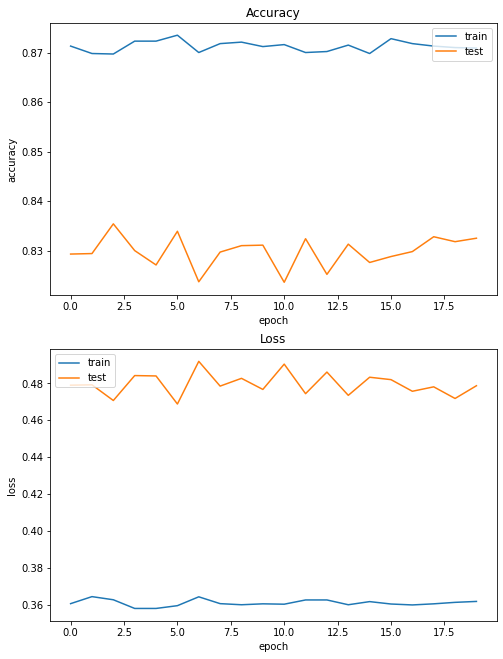

In [ ]:
train_acc = [0.8713, 0.8698, 0.8697, 0.8723, 0.8723, 0.8735, 0.87, 0.8718, 0.8721, 0.8712, 0.8716, 0.87, 0.8702, 0.8715, 0.8698, 0.8728, 0.8718, 0.8713, 0.871, 0.8709]
train_loss = [0.3606, 0.3644, 0.3627, 0.358, 0.358, 0.3595, 0.3643, 0.3606, 0.36, 0.3605, 0.3603, 0.3626, 0.3626, 0.36, 0.3617, 0.3604, 0.3599, 0.3605, 0.3613, 0.3618] 
test_loss = [0.4789, 0.4791, 0.4706, 0.4841, 0.4839, 0.4687, 0.4918, 0.4784, 0.4826, 0.4766, 0.4903, 0.4743, 0.486, 0.4734, 0.4832, 0.4819, 0.4756, 0.478, 0.4717, 0.4786]
test_acc = [0.8293, 0.8294, 0.8354, 0.83, 0.8271, 0.8339, 0.8237, 0.8297, 0.831, 0.8311, 0.8236, 0.8324, 0.8252, 0.8313, 0.8276, 0.8288, 0.8298, 0.8328, 0.8318, 0.8325]


plt.figure(figsize=(8,11))

# Accuracy
plt.subplot(211)
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Loss
plt.subplot(212)
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()